# Cars Price Prediction using Different Models

## Project Goal

The goal of this project is to develop a machine learning model to estimate the maximum selling retail price (MSRP) of upcoming car models. A company that provides information, pictures, comparisons, and reviews about cars, wants to enhance its services by including estimated prices for upcoming models. To achieve this, we'll leverage the characteristics of previous car models from our dataset.

## Summary of the Data

The dataset contains information on 428 different car models with 15 columns, including:

- **Make:** The brand of the car
- **Model:** Model name
- **Type:** The utility type of the car (e.g., SUV, sedan)
- **Origin:** The region where the car was manufactured (Asia, Europe, or USA)
- **DriveTrain:** The drive type (front, rear, or all-wheel drive)
- **MSRP:** The maximum selling retail price of the model
- **Invoice:** The price customers actually paid for the model
- **EngineSize:** Engine size in liters
- **Cylinders:** Number of cylinders
- **HorsePower:** Engine power output measured in HP
- **MPG_City:** City Mileage
- **MPG_Highway:** Highway Mileage
- **Weight:** Weight of the car
- **Wheelbase:** The distance between the front and rear axles
- **Length:** Length of the car

## Dataset Source

The dataset for this project is available on Kaggle. You can access it [here](https://www.kaggle.com/datasets/ljanjughazyan/cars1/data).

In this notebook, we will explore, clean (wherever necessary), and analyze the data before building and evaluating predictive models to estimate the MSRP of upcoming car models.

Let's get started!


# Data Loading and Overview

In this initial step, we will load the required libraries and load the dataset to gain an understanding of its content. This includes examining the type of data, the number of rows and columns, and a summary of its statistics.

Let's begin by importing the necessary libraries and loading the dataset.

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [41]:
df = pd.read_csv(r"D:\Projects\XGBoost\Car Price Prediction\CARS.csv")

In [42]:
df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


In [8]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


The MSRP and Invoice columns are not showing up here since the dollar symbol before the values makes them string type. To make predictions, we will have to deal with that, by removing the dollar symbols and converting the column to an integer or float format

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


The "Cylinders" column seems to be missing 2 values as it shows only 426 values present in it.
We can inspect the column and address the issue of missing values. Our goal is to handle these missing values appropriately to ensure the integrity of the dataset for our analysis.

In [43]:
df[df['Cylinders'].isna()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


Through data inspection, we've identified that the 2 missing rows in the "Cylinders" column are associated with the "Mazda" make. With a dataset containing 428 data points and only one column missing values among 15 others, instead of immediately dropping the rows, we can explore the other "Mazda" cars in the dataset to determine if we can derive appropriate values for the missing "Cylinders" entries

In [7]:
df[df['Make']=="Mazda"]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
240,Mazda,Tribute DX 2.0,SUV,Asia,All,"$21,087","$19,742",2.0,4.0,130,22,25,3091,103,173
241,Mazda,Mazda3 i 4dr,Sedan,Asia,Front,"$15,500","$14,525",2.0,4.0,148,26,34,2696,104,178
242,Mazda,Mazda3 s 4dr,Sedan,Asia,Front,"$17,200","$15,922",2.3,4.0,160,25,31,2762,104,179
243,Mazda,Mazda6 i 4dr,Sedan,Asia,Front,"$19,270","$17,817",2.3,4.0,160,24,32,3042,105,187
244,Mazda,MPV ES,Sedan,Asia,Front,"$28,750","$26,600",3.0,6.0,200,18,25,3812,112,188
245,Mazda,MX-5 Miata convertible 2dr,Sports,Asia,Rear,"$22,388","$20,701",1.8,4.0,142,23,28,2387,89,156
246,Mazda,MX-5 Miata LS convertible 2dr,Sports,Asia,Rear,"$25,193","$23,285",1.8,4.0,142,23,28,2387,89,156
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174
249,Mazda,B2300 SX Regular Cab,Truck,Asia,Rear,"$14,840","$14,070",2.3,4.0,143,24,29,2960,112,188


Upon closer examination of the data for Mazda cars, we've identified some key insights to address the missing values in the "Cylinders" column:

- There are a total of 11 data points for Mazda cars, excluding the 2 missing values. Among the 9 present values, 7 have 4 cylinders, and 2 have 6 cylinders.
- We've observed a correlation between engine size and the number of cylinders. The two models with 6 cylinders have noticeably larger engine sizes, suggesting a potential connection between engine size and cylinder count.
- Our missing values have got the lowest engine size suggesting possible 4 cylinder models
- Cylinders also appear to be positively correlated with horsepower output. The two models with 6 cylinders have higher horsepower values. Interestingly, our two missing values also have high horsepower, further suggesting a potential 6-cylinder configuration.

Taking these observations into account, and considering that more cylinders can generate higher power even with smaller engine sizes, we will proceed with the assumption that the two missing models from Mazda have 6 cylinders. Additionally, their low mileage aligns with the two models that have 6 cylinders.

We will implement this assumption in handling the missing values for the "Cylinders" column associated with Mazda cars in our data.

In [44]:
df['Cylinders'].fillna(6.0, inplace=True)

Checking the info of the dataset again. It seems the non-null counts are aligning now

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Its time to replace the '$' symbol in the 'MSRP' and 'Invoice' columns. 
Once the symbol is removed, we can change the data type of the columns to integer to allow regression models to run

In [45]:
df["Invoice"] = df['Invoice'].str.replace("$","")
df['Invoice'] = df['Invoice'].str.replace(",","")
df['MSRP'] = df['MSRP'].str.replace("$","")
df["MSRP"] = df['MSRP'].str.replace(",","")

In [46]:
df['MSRP'] = df['MSRP'].astype("int64")
df['Invoice'] = df['Invoice'].astype("int64")

In [47]:
#Check the info of the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   Invoice      428 non-null    int64  
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 50.3+ KB


The MSRP and Invoice columns are not integers

In [48]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [14]:
df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.799065,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.559679,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


## Exploratory Data Analysis
Now that the MSRP and Invoice columns have been converted to integers, and the missing values have been filled, we can begin with the **Exploratory Data Analysis**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



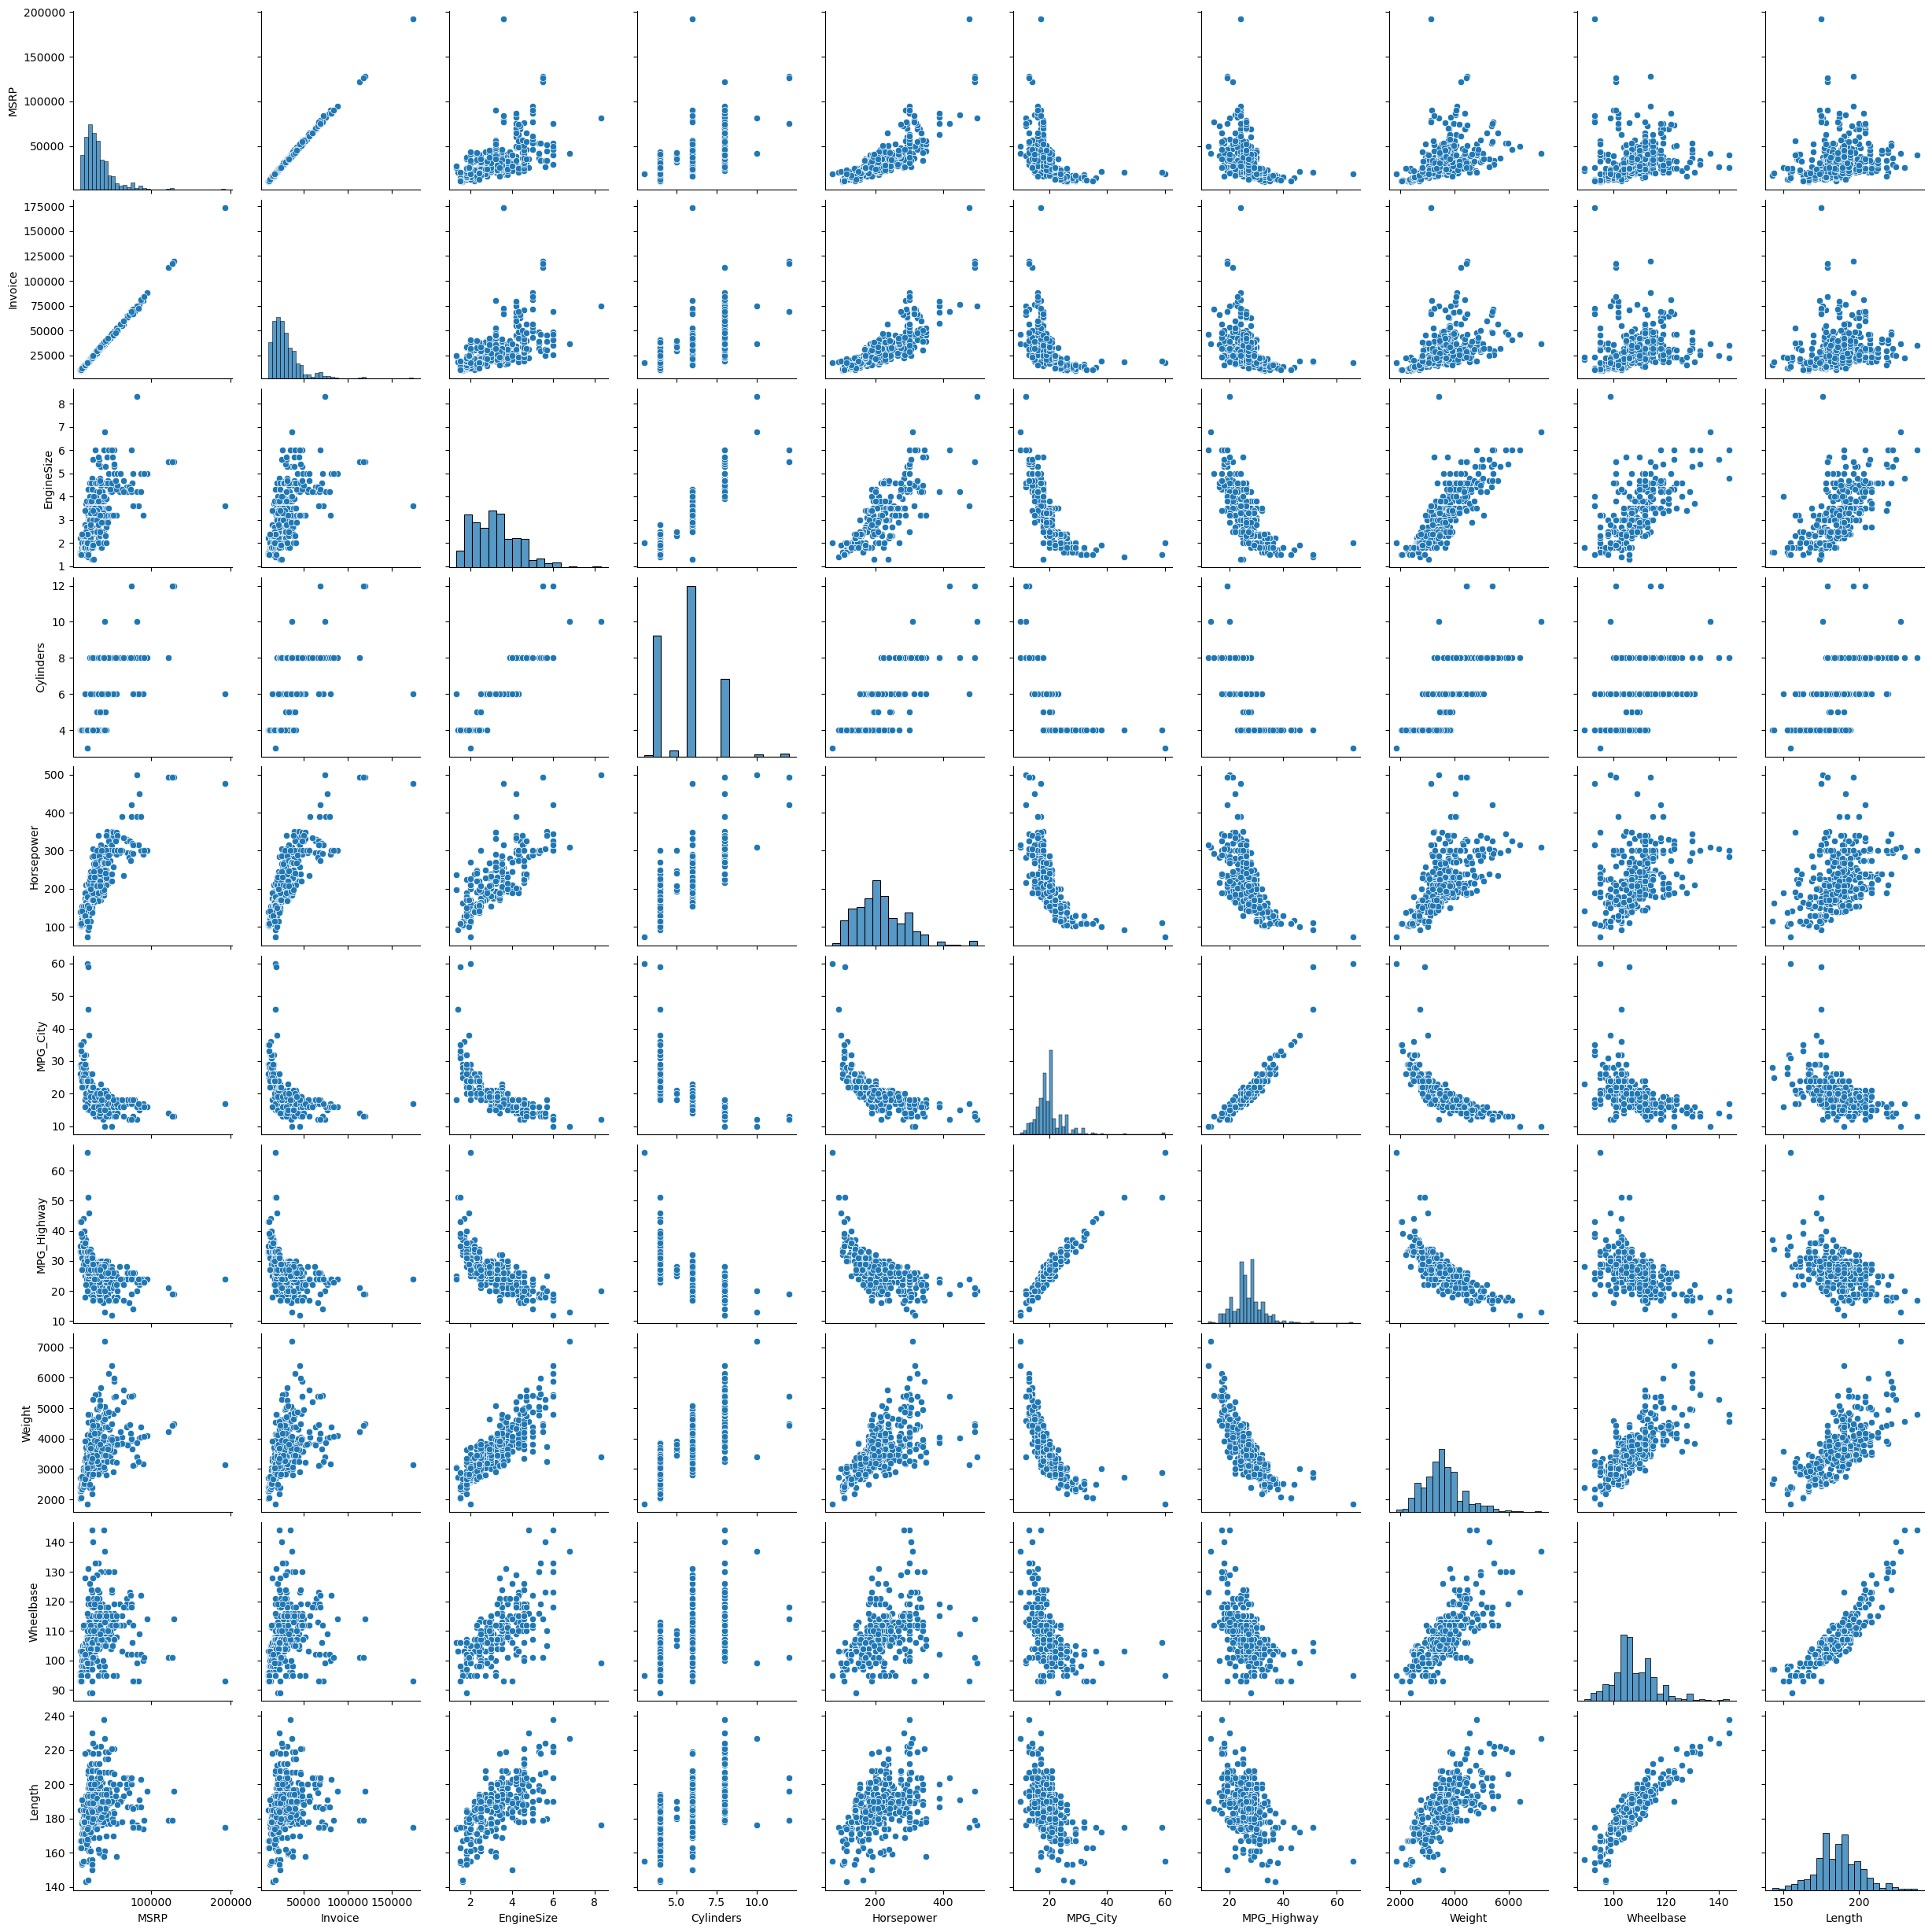

In [24]:
##Pairplot to give an overall summary of the bivariate relationships in the dataset
sns.pairplot(df)
plt.savefig("D:/Projects/XGBoost/Car Price Prediction/Plots/Pairplot.png")

We notice a few things here:
- Invoice and MSRP are nearly perfectly correlated, which makes sense since Invoice is just the MSRP subtracted by any discounts or offers that the dealer may be providing. As a result, for the implementation of our model, we will be dropping the Invoice column
- Near perfect correlations can also be found between MPG City and MPG Highway, as well as wheelbase and length. To deal with such multicollinearity we will use ensemble models for predictions
- There are quite a few relationships that we see which seem fairly obvious, such as the mileage of the car decreasing with weight as well as with an increase in the power output
- Engine size seems to be increasing with the increase in dimensions of the car and the mileage seems to be decreasing 
- Power, Engine Size, and Cyliners, all seem to be having an increasing effect on the MSRP. 
- The dimensions of the car also seem to be having an increasing effect on MSRP albeit to a lesser degree

In [25]:
fig = px.histogram(df,x = "Make",
                   labels={"Make":"Brand"},
                  title = "Brand of the Car",
                  color_discrete_sequence= ['#69250D'])

fig.show()

<Figure size 640x480 with 0 Axes>

The graph shows the number of models from each brand in the data set. Toyota has the highest count followed by Chevy and Mercedes-Benz. Hummer sits at the lowest count with inly one model, which makes sense since it is a rare car with very few models out there, on the other hand toyota is the largest car manufacturer in terms of volume, and sports a large selection of models. Other makes with low number of models include Isuzu, LR, Mini, Jeep, Scion and Oldsmobile

In [18]:
fig = px.histogram(df,x = "Origin", 
                  title = "Origin of the Car",
                  color_discrete_sequence= ['#58662C'])

fig.show()

The above graph shows the distribution of models by origin region, and we can see a fairly even distribution, with all three regions having Automobile giants like Ford and Chevy in USA, Mercedes, BMW, Volkswagen (all German giants) in Europe, and Asia being dominated by Japanese giants like Toyota, Honda, Nissan and so on.

In [19]:
fig = px.histogram(df,x = "DriveTrain", 
                  title = "DriveTrain",
                  color_discrete_sequence= ['#B4AC3A'])

fig.show()

Front wheel drive has a sginficantly higher number of models which make sense, as most common use compacts and sedans for in-city travel use FWD. AWD is something used for SUVs and sports cars, and RWD is mainly used in luxury cars

In [20]:
fig = px.histogram(df,x = "Type", 
                   labels="Type of Car",
                  title = "Type of the car",
                  color_discrete_sequence= ['#577E83'])

fig.show()

Sedans show the highest count which makes sense as they are the most common type of car used in the US

In [21]:
fig = px.histogram(df,x = "Make",
                   labels={"Make":"Brand"},
                   color="Origin",
                  title = "Brand vs Origin"
                  )

fig.show()

This chart further breaks down the Origin and Make in the dataset. Interestingly, in Europe, besides Jaguar/Land Rover, all brands are German while the former 2 are british, on in the Asian group, most brands are japanese, save for Hyundai and Kia, which are Korean

In [22]:
fig = px.histogram(df,x = "Make",
                   labels={"Make":"Brand"},
                   color="Type",
                  title = "Brand by Type"
                  )

fig.show()

Breakdown of Brands and type of car shows that most brands have sedans as their major production lines, save for a very few niche brands like Jeep, Isuzu LR, Hummer, which specialize is heavy duty cars and SUVs and Porsche which specialises in high performance sports cars. Notably, Porsche's only got one SUV (the Cayenne) besides which its the only brand in this dataset completely based in Sports cars

In [26]:
###Building a wordcloud visual
from wordcloud import WordCloud,STOPWORDS

In [27]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [28]:
##Making a list with the model names
text = df.Model.values

In [29]:
text

array(['MDX', 'RSX Type S 2dr', 'TSX 4dr', 'TL 4dr', '3.5 RL 4dr',
       '3.5 RL w/Navigation 4dr', 'NSX coupe 2dr manual S', 'A4 1.8T 4dr',
       'A41.8T convertible 2dr', 'A4 3.0 4dr',
       'A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto',
       'A6 3.0 4dr', 'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr',
       'A4 3.0 Quattro convertible 2dr', 'A6 2.7 Turbo Quattro 4dr',
       'A6 4.2 Quattro 4dr', 'A8 L Quattro 4dr', 'S4 Quattro 4dr',
       'RS 6 4dr', 'TT 1.8 convertible 2dr (coupe)',
       'TT 1.8 Quattro 2dr (convertible)',
       'TT 3.2 coupe 2dr (convertible)', 'A6 3.0 Avant Quattro',
       'S4 Avant Quattro', 'X3 3.0i', 'X5 4.4i', '325i 4dr', '325Ci 2dr',
       '325Ci convertible 2dr', '325xi 4dr', '330i 4dr', '330Ci 2dr',
       '330xi 4dr', '525i 4dr', '330Ci convertible 2dr', '530i 4dr',
       '545iA 4dr', '745i 4dr', '745Li 4dr', 'M3 coupe 2dr',
       'M3 convertible 2dr', 'Z4 convertible 2.5i 2dr',
       'Z4 convertible 3.0i 2dr', '325xi Sport', 'Ra

In [30]:
##Setting up stopwords to eliminate. Stopwords are common worders like prepositions and verbs and pronouns.
##While it may not be very effective in this case, it is still standard practice
stopwords = set(STOPWORDS)

In [31]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [32]:
#Creating the wordcloud configuration
wc = WordCloud(max_words=1000, max_font_size=100, random_state=3,
               stopwords=stopwords, contour_width=3).generate(str(text))

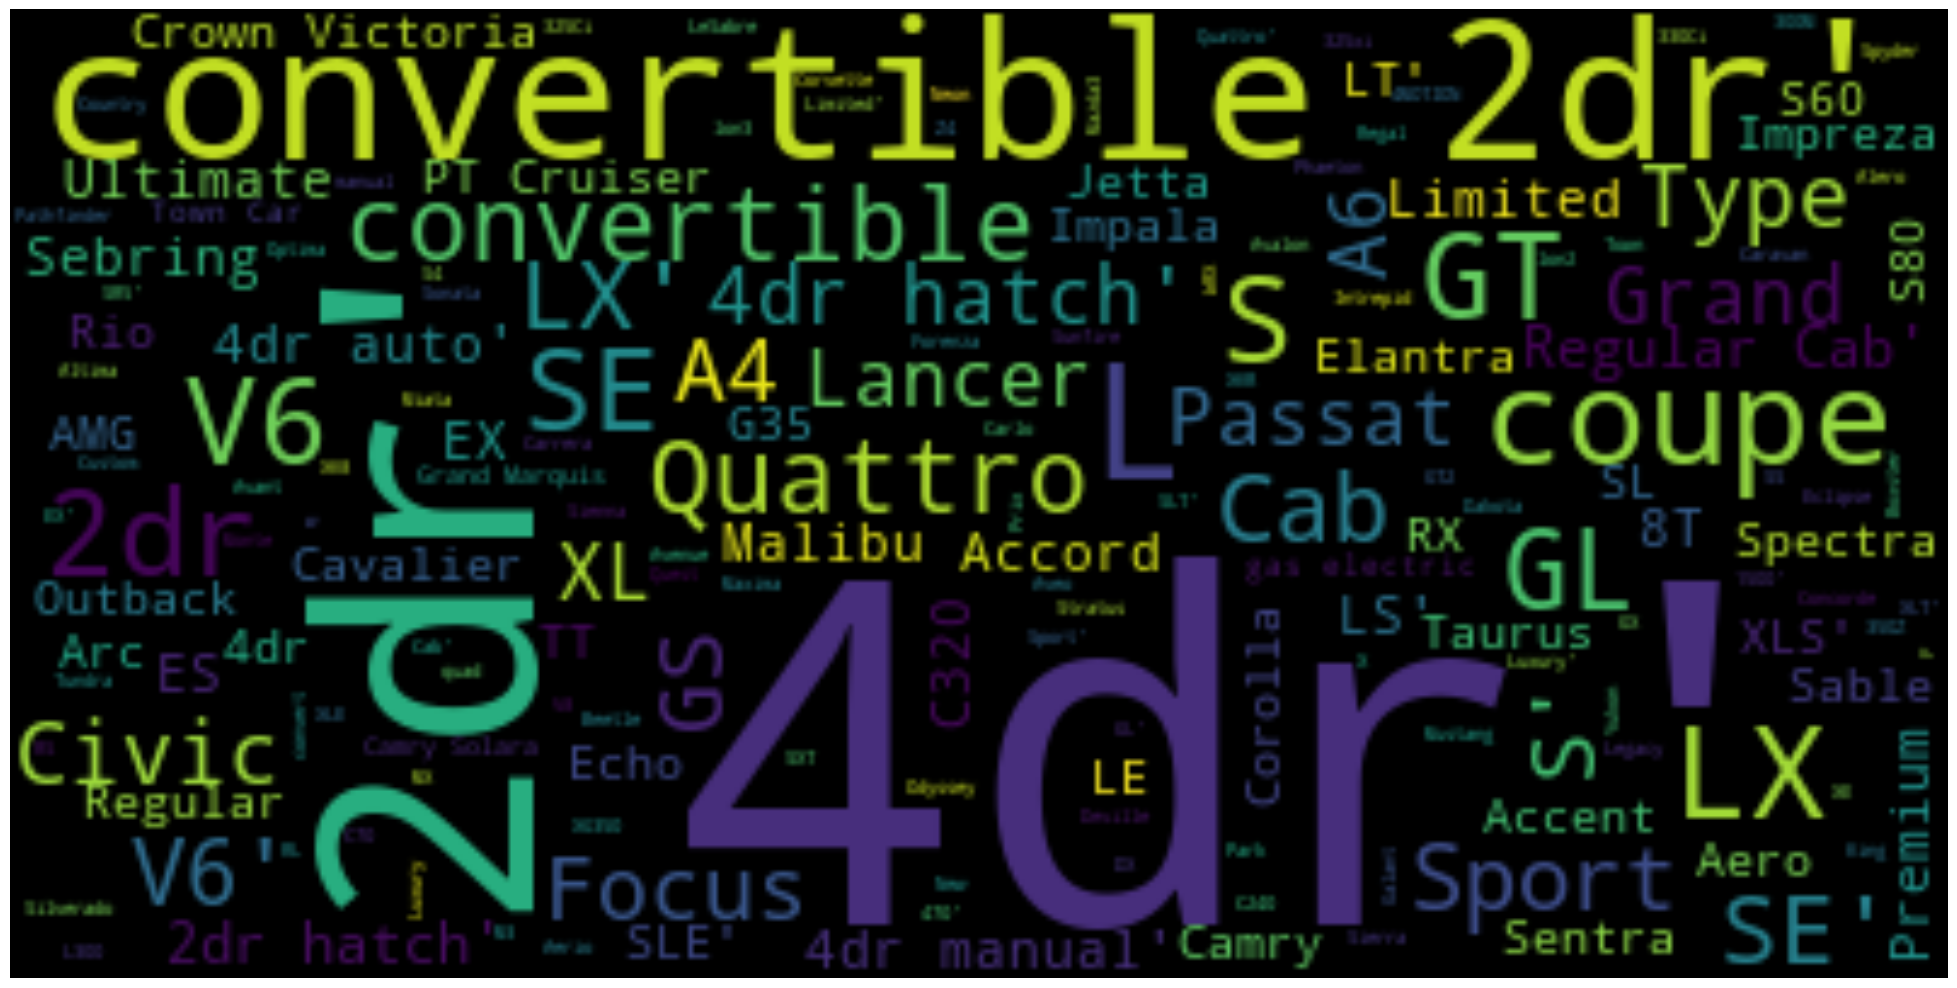

In [37]:
#Creating the visual. The biliear interpolation allows for the distribution of pixels to create the image in 2d
fig = plt.figure(figsize=(25,15))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

The wordcloud suggests that there are a lot more 4 door cars in the list than 2 door, quite a few cars are convertibles, there are models with the V6 engine. Words like 'Focus', "Quattro", "Passat" suggest that there are multiple variations of the same overall car, making them separate models

In [56]:
Corrplot = df.iloc[:,5:]

In [57]:
Corrplot.corr()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.571753,0.649366,0.826945,-0.475020,-0.439622,0.448426,0.152000,0.172037
Invoice,0.999132,1.000000,0.564498,0.644870,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.571753,0.564498,1.000000,0.900702,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.649366,0.644870,0.900702,1.000000,0.810169,-0.684356,-0.676035,0.740897,0.546474,0.546308
Horsepower,0.826945,0.823746,0.787435,0.810169,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.475020,-0.470442,-0.709471,-0.684356,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.676035,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.448426,0.442332,0.807867,0.740897,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.152000,0.148328,0.636517,0.546474,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.172037,0.166586,0.637448,0.546308,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


Let us map out the correlations between features one more time with a heatmap before we move to modelling

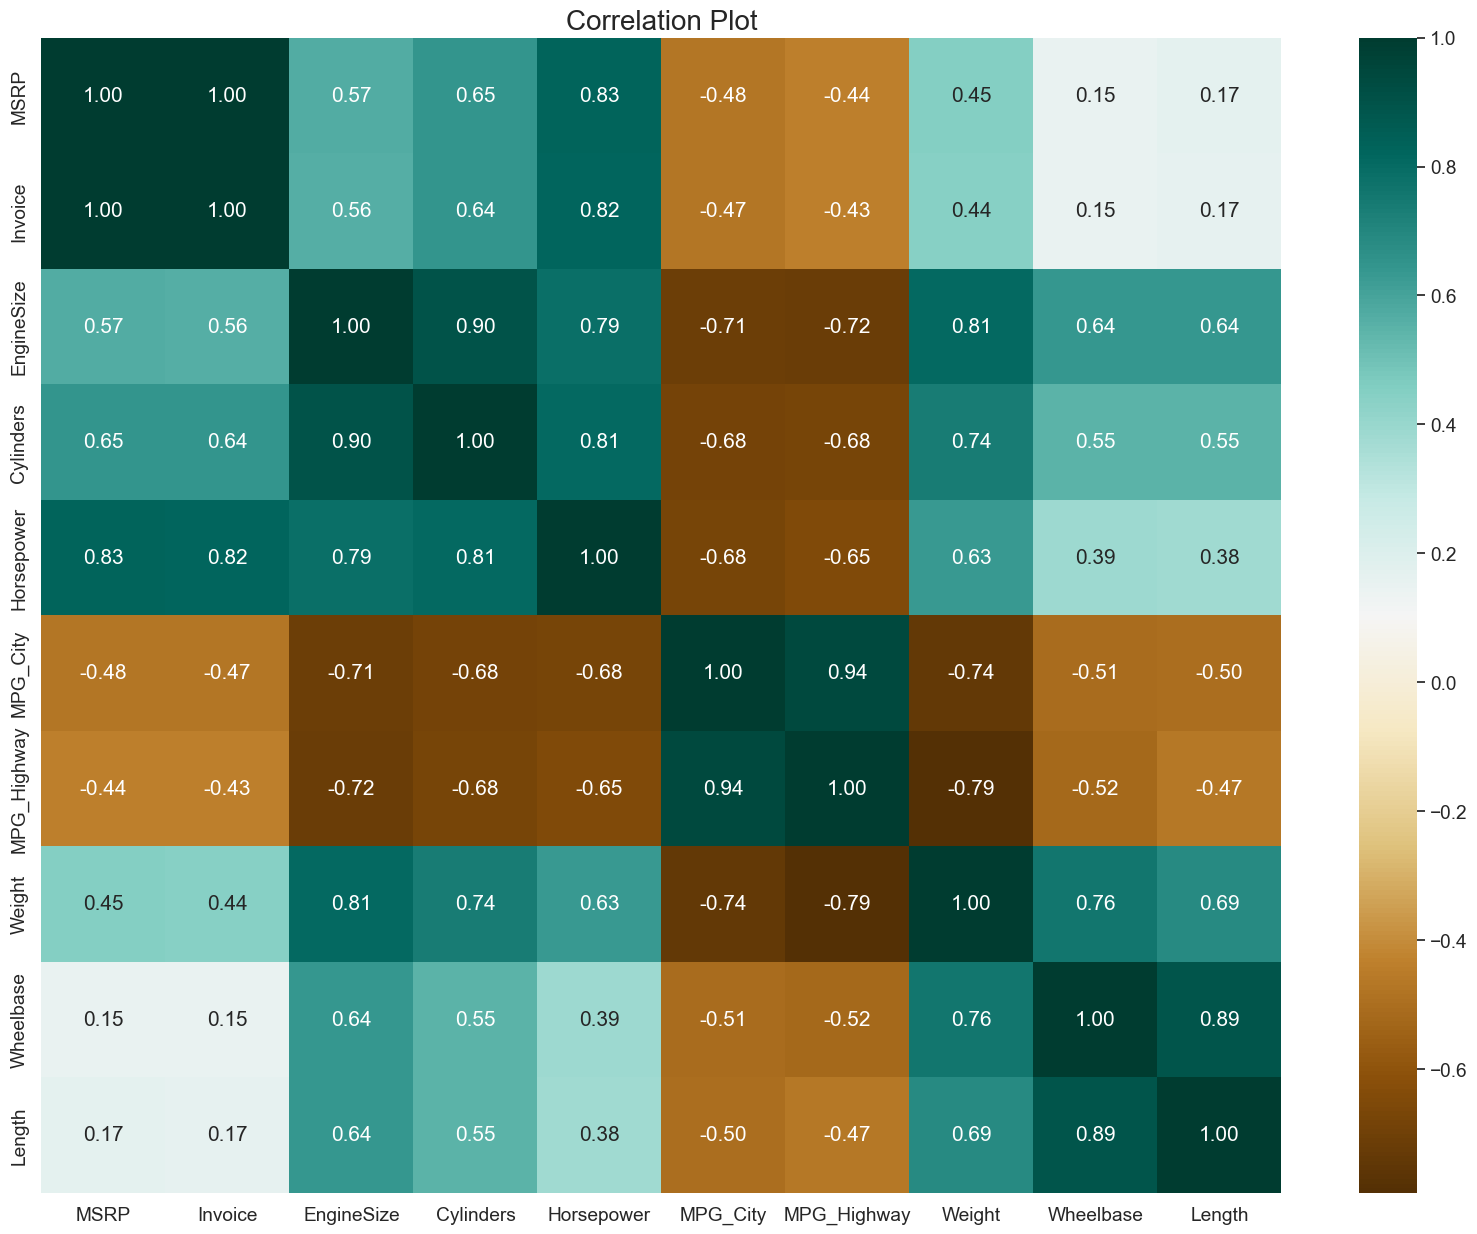

In [59]:
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(Corrplot.corr(), annot=True, fmt= '.2f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.title("Correlation Plot",fontdict={"fontsize":20})
plt.savefig("D:/Projects/XGBoost/Car Price Prediction/Plots/Heatmap.png")

- The relationships earlier explored through a pairplot are not quantified with their correlation coefficients.
- As explored when dealing with Mazda, it can be seen that Engine size and cylinders are positively correlated, but horsepower and cylinders show even higher correlation, coupled with the strong inverse relationship with mileage, it seems our decision to input 6 for the missing values was appropriate
- In regards to our target variable, we have strong positive correlations with weight, horsepower, cylinders and engine size, with mileage having a negative relationship

In [51]:
#Dealing with categorical variables by making dummy variables
df_dummies = pd.get_dummies(df,columns=['Make','Type','Origin','DriveTrain'])

In [52]:
df_dummies

,Model,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,MDX,36945,33337,3.5,6.0,265,17,23,4451,106,...,0,0,0,0,1,0,0,1,0,0
1,RSX Type S 2dr,23820,21761,2.0,4.0,200,24,31,2778,101,...,1,0,0,0,1,0,0,0,1,0
2,TSX 4dr,26990,24647,2.4,4.0,200,22,29,3230,105,...,1,0,0,0,1,0,0,0,1,0
3,TL 4dr,33195,30299,3.2,6.0,270,20,28,3575,108,...,1,0,0,0,1,0,0,0,1,0
4,3.5 RL 4dr,43755,39014,3.5,6.0,225,18,24,3880,115,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,C70 LPT convertible 2dr,40565,38203,2.4,5.0,197,21,28,3450,105,...,1,0,0,0,0,1,0,0,1,0
424,C70 HPT convertible 2dr,42565,40083,2.3,5.0,242,20,26,3450,105,...,1,0,0,0,0,1,0,0,1,0
425,S80 T6 4dr,45210,42573,2.9,6.0,268,19,26,3653,110,...,1,0,0,0,0,1,0,0,1,0
426,V40,26135,24641,1.9,4.0,170,22,29,2822,101,...,0,0,0,1,0,1,0,0,1,0


In [53]:
#Dropping Invoice due to its 100% correlation with MSRP and Models since they are unique for each row 
df_data = df_dummies.drop(["Invoice","Model"],axis=1)

We can split the data now into training and testing for implementing the models

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df_data.drop("MSRP",axis=1)
y = df_data['MSRP']
X = np.array(X)
y = np.array(y)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

The first model we'll run is the standard linear regression, to compare different models and make sure we are using the most effective model

#### Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt

To measure the performance of all the models we will use the mean squared, mean absolute error, and the coefficient of determination or R2

In [62]:
linear_model = LinearRegression()

In [63]:
#Training the model
linear_model.fit(X_train,y_train)

LinearRegression()

In [65]:
#Predicting y test
pred = linear_model.predict(X_test)

In [66]:
pred

array([ 51835.87119668,  22161.11903982,  23951.6736797 ,  32245.33592687,
        18771.70423859, 106328.3937611 ,  14604.96786875,  15543.44678713,
        34873.73185429,  18756.39858049,  45590.45648304,  16101.13876348,
        73325.80250925,  27364.21421093,  62091.30422722,  29958.98213383,
        15309.90239935,  23493.27155137,  38216.62981048,  28834.8143177 ,
        41845.94721447,  43128.27924097,  32910.77890253,  54683.6327202 ,
        15371.18635928,  53049.18083684,  10467.63360451,  18884.93067545,
        26491.00222167,  19990.08291461,  12810.0367133 ,  13305.34586707,
        92422.95909302,  28188.83443699,  35166.31431519,  33972.31101622,
        12033.61702576,  17549.50465673,  25431.76665359,  43837.03867991,
        56467.5962498 ,   7903.22461936,  28422.36852567,  18696.10064493,
        38953.78506676,  17927.963884  ,  12976.52569238,  26621.75082515,
        11419.31947218,  32050.97949102,  39614.00125457,  61277.86796616,
        64072.21430659,  

In [75]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

63004209.77816817
5967.300604577024
0.8135366625419685


We have got the metrics for our predictions and it seems the linear model has done fine, despite the multicollinearity in the data. However, its only after comparing it with ensemble models can we determine if this is optimal

#### Random Forests

Its time to implement Random Forest model, we will apply both decision trees and an ensemble of trees called the random forest

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Training the decision tree first

In [82]:
d_model= DecisionTreeRegressor()

In [83]:
d_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [84]:
d_model.score(X_test,y_test)

0.7398339257415505

In [85]:
d_pred = d_model.predict(X_test)

In [86]:
print(mean_squared_error(y_test,d_pred))
print(mean_absolute_error(y_test,d_pred))
print(r2_score(y_test,d_pred))

87907672.05607477
6294.794392523365
0.7398339257415505


As observable, the decision tree performed poorly compared to the linear regression model. Its possible that the high multicollinearity introduced a lot of bias in the model, something with the decision trees are highly sensitive to. 
No matter, we will run an ensemble of decision trees to see if they show better results

In [101]:
%%time

cv_params = {'max_depth':[2,3,4,5,None],
            'min_samples_leaf': [1,2,3],
            'min_samples_split': [2,3,4],
            'max_features':[2,3,4],
            'n_estimators': [75,100,125,150]
            }

rf_model = RandomForestRegressor()

scoring = {'r2','neg_mean_squared_error','neg_mean_absolute_error'}

rf_cv = GridSearchCV(rf_model,cv_params,scoring=scoring,cv=5,refit='r2')

rf_cv.fit(X_train,y_train)

Wall time: 7min 3s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='r2',
             scoring={'neg_mean_absolute_error', 'neg_mean_squared_error',
                      'r2'})

The hyperparameters tuning we've done is explained below:
- `cv_params`: A dictionary containing various hyperparameters and their respective values.

  - **`max_depth`**: Controls the maximum depth of each decision tree in the Random Forest. A deeper tree can capture more complex relationships in the data but may lead to overfitting if set too high. Possible values include 2, 3, 4, 5, and 'None' (unlimited depth).

  - **`min_samples_leaf`**: Specifies the minimum number of samples required to be in a leaf node (end of a branch). A higher value can prevent overfitting by ensuring that each leaf contains a sufficient number of data points. Possible values are 1, 2, and 3.

  - **`min_samples_split`**: Sets the minimum number of samples required to split an internal node. Similar to `min_samples_leaf`, this parameter controls overfitting by imposing constraints on how nodes are split. It can help prevent overly complex trees. Possible values are 2, 3, and 4.

  - **`max_features`**: Defines the maximum number of features to consider when making splits in the decision trees. It controls the randomness and diversity among the trees. Possible values include 2, 3, and 4.

  - **`n_estimators`**: Represents the number of decision trees (estimators) in the Random Forest ensemble. The Random Forest combines the predictions of multiple trees to improve accuracy and reduce overfitting. A higher number of estimators can lead to better performance but may increase computational cost. Possible values include 75, 100, 125, and 150.

- `rf_model`: Initializes a Random Forest Regressor model.

- `scoring`: A set of scoring metrics used to evaluate the model. In this case, it includes 'r2' (coefficient of determination), 'neg_mean_squared_error' (negative mean squared error), and 'neg_mean_absolute_error' (negative mean absolute error). Negative mse and mae have the same absolute value as the regular mse and mae, but values are displayed in negative

- `rf_cv`: This is an instance of the `GridSearchCV` class. It performs a grid search cross-validation to find the best hyperparameters for the Random Forest model. The `cv` parameter is set to 5, indicating 5-fold cross-validation.

- `rf_cv.fit(X_train, y_train)`: This line fits the Random Forest model to the training data (`X_train` and `y_train`) while simultaneously conducting a grid search to find the optimal hyperparameters. The `refit` parameter is set to 'r2,' indicating that the model should be refitted using the best hyperparameters based on the 'r2' score.


In [102]:
rf_cv.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=125)

The best estimators for this model for this data have been max features at the value of 4 and 125 estimators or trees.

In [104]:
rf_pred = rf_cv.predict(X_test)

In [105]:
print(mean_squared_error(y_test,rf_pred))
print(mean_absolute_error(y_test,rf_pred))
print(r2_score(y_test,rf_pred))

35511973.71807473
4008.195916332889
0.8949009730856331


The predictions of the random forest have lower MSE and MAE as well as a higher coefficient of determination than linear regression, therefore it has clearly performed better

#### Booster Models

In [113]:
from xgboost import XGBRegressor

In [115]:
cv_params = {"max_depth":[4,5,6,7,8],
            'min_child_weight':[1,2,3,4,5],
            'learning_rate':[0.1,0.2,0.3],
            'n_estimators':[75,100,125,150]
            }
xgb = XGBRegressor()

scoring = {'r2','neg_mean_squared_error','neg_mean_absolute_error'}

xgb_cv = GridSearchCV(xgb,cv_params,scoring=scoring,refit='r2')

This part is very similar to the random forest cross validation. The hyperparameters that have been tuned here are:
- **max_depth**: This parameter controls the maximum depth of each decision tree in the XGBoost ensemble. A deeper tree can capture more complex relationships in the data but may lead to overfitting if set too high. We consider values of 4, 5, 6, 7, and 8.

- **min_child_weight**: Specifies the minimum sum of instance weight (hessian) needed in a child. A higher value can make the algorithm more conservative. We consider values of 1, 2, 3, 4, and 5.

- **learning_rate**: Learning rate shrinks the contribution of each tree. A lower learning rate makes the model more robust but requires more boosting rounds. We consider values of 0.1, 0.2, and 0.3.

- **n_estimators**: The number of boosting rounds (trees) in the XGBoost ensemble. We consider values of 75, 100, 125, and 150.

In [116]:
%%time

xgb_cv.fit(X_train,y_train)

Wall time: 1min 54s


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                      

In [117]:
#This is the same as R2 score
xgb_cv.score(X_test,y_test)

0.9254293456545881

In [118]:
xgbpred = xgb_cv.predict(X_test)

In [119]:
print(mean_squared_error(y_test,xgbpred))
print(mean_absolute_error(y_test,xgbpred))
print(r2_score(y_test,xgbpred))

25196723.4616889
3517.8651887412384
0.9254293456545881


**The results show that the XGBoost model has given us the least error in predicting the MSRP, and the highest coefficient of determination.**

**Therefore, the model that the website should go for, to predict the prices for upcoming car models is the Extreme Gradient Boosting or (XGBoost) algorithm)**

#### Regression KPIs

To put all the models that we have used together and compare their performance visually, we will plot a regression plot. Which is sort of a line chart comparing our predicted values to the actual values and where the data points lie compared to the fit line

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price'),
 Text(0, 0.5, 'Actual Price')]

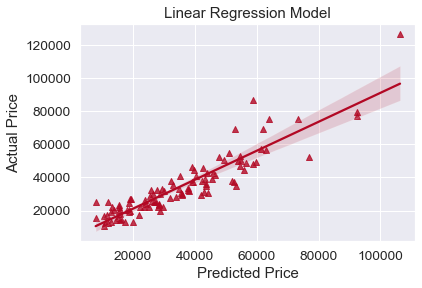

In [125]:
fig = sns.regplot(pred,y_test,color='#B20824',marker="^")
fig.set(title = "Linear Regression Model",xlabel = "Predicted Price",ylabel = "Actual Price")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Decision Tree Model'),
 Text(0.5, 0, 'Predicted Price'),
 Text(0, 0.5, 'Actual Price')]

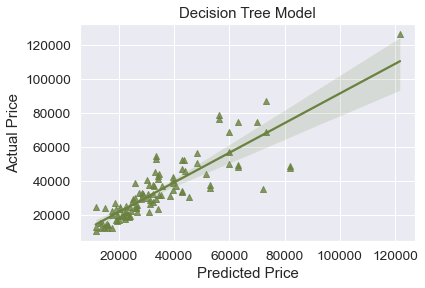

In [126]:
fig = sns.regplot(d_pred,y_test,color='#6A8140',marker="^")
fig.set(title = "Decision Tree Model",xlabel = "Predicted Price",ylabel = "Actual Price")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Random Forest Model'),
 Text(0.5, 0, 'Predicted Price'),
 Text(0, 0.5, 'Actual Price')]

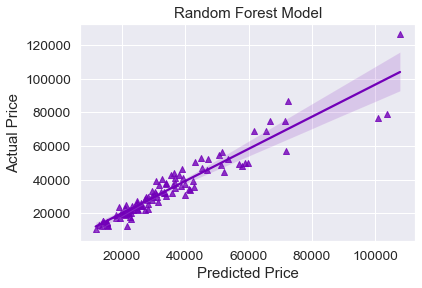

In [127]:
fig = sns.regplot(rf_pred,y_test,color='#7200B8',marker="^")
fig.set(title = "Random Forest Model",xlabel = "Predicted Price",ylabel = "Actual Price")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0.5, 1.0, 'Random Forest Model'),
 Text(0.5, 0, 'Predicted Price'),
 Text(0, 0.5, 'Actual Price')]

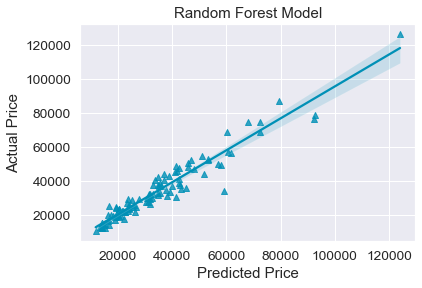

In [129]:
fig = sns.regplot(xgbpred,y_test,color='#0090B6',marker="^")
fig.set(title = "Random Forest Model",xlabel = "Predicted Price",ylabel = "Actual Price")

- **As expected, since our XGBoost model had the highest coefficient of determination with 0.925, the test data points are almost superimposed on the regression line.**
- **The Random Forest model is also close with its impressive 0.895 R2 score.**
- **The Linear regression model shows greater lateral distance between the regression line and the data points. Interestingly, its predicting fairly well for the cars of the lower price range, but at the higher range, the error has increased. Its overall score is 0.813**
- **The individual decision tree's performance is the weakest among the models used but not bad when considered in isloation. It also performs better at the lower price range gradually faltering in performance with the higher range cars. Its R2 is 0.798**

**Limitations of the Analysis**
- The dataset size is extremely small with only 428 models. There are easily hundreds of brands out there and thousands of unique models which would enhance the effectiveness of the model and the analysis
- Attributes are limited. There are a lot more aspects of a car (comfort, features, etc) that influence the price of a car. Categorical variables like the presence of sunroofs, touch-screen infotainment systems, cruise control, etc. would most definitely increase the scope of the analysis as well as the predictions